In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import math

# Cargar el dataset

file_path = '/workspaces/Proyecto_DS/GAM_Multimedios_3años.csv'
data = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip', encoding='utf-8')

print(data.head())


  Month and year             Ad unit  Impressions Viewability  Ad requests
0        06/2021  APP_MMTelediarioCR          159        0,79        67200
1        06/2021             Default       132608        0,47        45684
2        06/2021             MMBajio          253        0,41          470
3        06/2021         MMCostaRica        28894        0,41        46718
4        06/2021           MMDigital      5054971        0,50      6422668


In [2]:
# Reemplazar la coma por el punto y convertir a float en la columna 'Viewability'
data['Viewability'] = data['Viewability'].str.replace(',', '.').astype(float)

# Convertir 'Month and year' a tipo datetime
data['Month and year'] = pd.to_datetime(data['Month and year'], format='%m/%Y')

# Mostrar información del dataset
print("Información del data set: ")
data.info()

Información del data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month and year  1174 non-null   datetime64[ns]
 1   Ad unit         1174 non-null   object        
 2   Impressions     1174 non-null   int64         
 3   Viewability     1174 non-null   float64       
 4   Ad requests     1174 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.0+ KB


In [3]:
# Mostrar resumen estadístico del dataset
print("Resumen estadístico: ")
summary = data.describe()
formatted_summary = summary.applymap(lambda x: '{:.2f}'.format(x))
print(formatted_summary)

Resumen estadístico: 
      Month and year  Impressions Viewability  Ad requests
count        1174.00      1174.00     1174.00      1174.00
mean             .2f   1454968.59        0.61   2088421.35
min              .2f         0.00        0.00       100.00
25%              .2f        76.25        0.35      1100.00
50%              .2f      3261.00        0.73      8572.50
75%              .2f    131491.25        0.90     53079.25
max              .2f  55316097.00        1.50  65093555.00
std              nan   5098378.85        0.34   7053847.53


/tmp/ipykernel_13525/3409146656.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary = summary.applymap(lambda x: '{:.2f}'.format(x))


In [4]:
print("Valores nulos: ")
data.isnull().sum()

Valores nulos: 


Month and year    0
Ad unit           0
Impressions       0
Viewability       0
Ad requests       0
dtype: int64

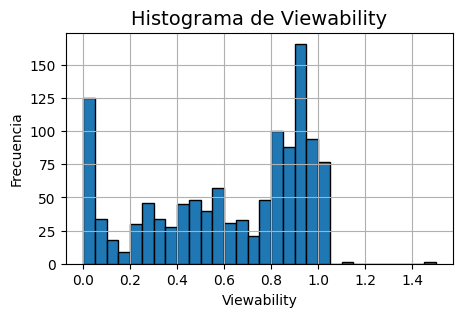

In [5]:
# Histograma de Viewability
data['Viewability'].hist(bins=30, edgecolor='black', figsize=(5, 3))
plt.title('Histograma de Viewability', fontsize=14)
plt.xlabel('Viewability')
plt.ylabel('Frecuencia')
plt.show()

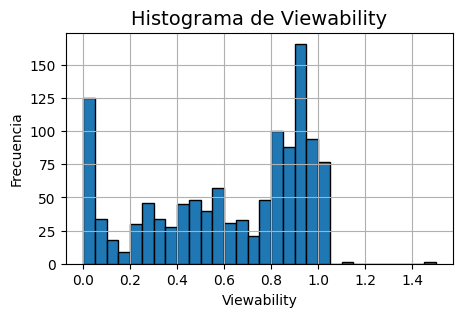

In [6]:
# Histograma de Viewability
data['Viewability'].hist(bins=30, edgecolor='black', figsize=(5, 3))
plt.title('Histograma de Viewability', fontsize=14)
plt.xlabel('Viewability')
plt.ylabel('Frecuencia')
plt.show()

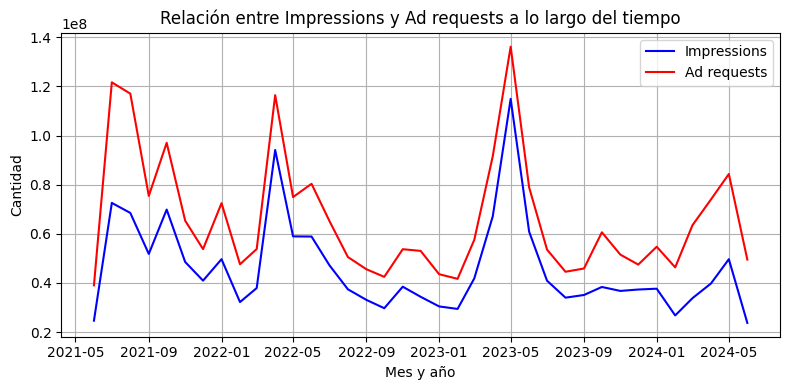

In [7]:
# Agrupar por mes y sumar las impresiones y solicitudes de anuncio
df_monthly = data.groupby('Month and year').sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(8, 4))
plt.plot(df_monthly['Month and year'], df_monthly['Impressions'], color='blue', label='Impressions')
plt.plot(df_monthly['Month and year'], df_monthly['Ad requests'], color='red', label='Ad requests')
plt.title('Relación entre Impressions y Ad requests a lo largo del tiempo')
plt.xlabel('Mes y año')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

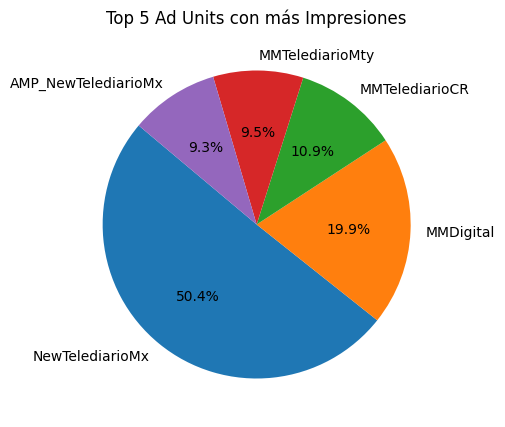

In [8]:
# Contar el número de impresiones por ad unit
impressions_by_unit = data.groupby('Ad unit')['Impressions'].sum()

# Ordenar las unidades de anuncio por impresiones en orden descendente y seleccionar las primeras 5
top_units = impressions_by_unit.sort_values(ascending=False).head(5)

# Crear un gráfico circular para mostrar las 5 unidades de anuncio con más impresiones
plt.figure(figsize=(5, 5))
plt.pie(top_units, labels=top_units.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Ad Units con más Impresiones')
plt.show()

Resultados de la Exploración de Datos (EDA)

**Información del Dataset**

El dataset contiene 2126 filas y 8 columnas. Las columnas y sus tipos de datos son:

    Ad unit: object
    Month and year: object
    Impressions: int64
    Viewability: float64
    Ad requests: int64

**Estadísticas Descriptivas**

Algunas estadísticas descriptivas para las variables numéricas:

    Total impressions:
        Media: 1454968.59
        Desviación estándar: 5098378.85
        Mínimo: 0
        Máximo: 55316097

    Viewability:
        Media: 0.61
        Desviación estándar: 0.34
        Mínimo: 0.00
        Máximo: 1.50

    Ad requests:
        Media: 2088421.35
        Desviación estándar: 7053847.53
        Mínimo: 0
        Máximo: 65093555

**Valores Nulos**

Hay no valores nulos.

**Correlaciones**

Las correlaciones entre las variables numéricas son las siguientes:

    Impressions y ad requests tienen una alta correlación positiva (0.98).

    Viewability tiene una correlación baja con las demás variables.

In [9]:
# Convertir la columna 'fecha' en formato datetime
data['Month and year'] = pd.to_datetime(data['Month and year'])

# Extraer mes y año
data['mes'] = data['Month and year'].dt.month

# Seleccionar las columnas relevantes
X = data[['Impressions', 'Ad requests']]
y = data['Impressions']

In [10]:
# Seleccionar las 3 mejores características con base en la prueba F para regresión
selector = SelectKBest(f_regression, k=2)
X_selected = selector.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Impressions', 'Ad requests'], dtype='object')


In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Por algun motivo que desconozco me devuelve los valores en notacion científica, por eso me veo obligada a formatear y_pred para poder mostrarlo correctamente.
y_pred_numerico = np.array(y_pred, dtype=float)
y_pred_formatted = [f"{val:.0f}" for val in y_pred_numerico]

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse_formatted = f"{mse:.4f}"
rmse_formatted =f"{rmse:.3f}"

print("Error cuadrático medio (MSE):", mse_formatted)
print("Raíz cuadrada del MSE (RMSE):", rmse_formatted)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.0000
Raíz cuadrada del MSE (RMSE): 0.000
Coeficiente de determinación (R^2): 1.0


In [12]:
print("Y test: ", y_test.values)

Y test:  [    2371      870   152011      174     6327  5019778   230756       88
  4552591        4        2  9033431       33      227       60     3049
       14    42025       13   544043  3104429      891        0    71817
   290328  1258632   167005     3133       23     6307  4865289       21
  3547449        0   107363     2976   781465        3 12832930     8627
        3        0        0     5173  8915722   408257   133666     7687
       20 28339240   190541  4908485        9      277   831496    24463
        7     3573      807  3860583       19      475   254743      265
      309        8    13103    44846      122        0      103  4792067
     1772   145977        0   646804   605479        3       68 13748417
       37  4967329        0        0        6 21316874     4122    49888
       89        0        2     2315        4     7045      914    33316
  5507570   128141   333421      120     6432       70   124593   766918
    34038      588      502    85273   154

In [13]:
print(y_pred_formatted)

['2371', '870', '152011', '174', '6327', '5019778', '230756', '88', '4552591', '4', '2', '9033431', '33', '227', '60', '3049', '14', '42025', '13', '544043', '3104429', '891', '0', '71817', '290328', '1258632', '167005', '3133', '23', '6307', '4865289', '21', '3547449', '0', '107363', '2976', '781465', '3', '12832930', '8627', '3', '0', '0', '5173', '8915722', '408257', '133666', '7687', '20', '28339240', '190541', '4908485', '9', '277', '831496', '24463', '7', '3573', '807', '3860583', '19', '475', '254743', '265', '309', '8', '13103', '44846', '122', '0', '103', '4792067', '1772', '145977', '0', '646804', '605479', '3', '68', '13748417', '37', '4967329', '0', '0', '6', '21316874', '4122', '49888', '89', '0', '2', '2315', '4', '7045', '914', '33316', '5507570', '128141', '333421', '120', '6432', '70', '124593', '766918', '34038', '588', '502', '85273', '154925', '196756', '15507', '7322', '1471', '17949', '0', '14197', '4', '2307', '5554', '0', '3245', '14463', '167', '361907', '8249'

In [14]:
# Analizar la importancia de las características seleccionadas
feature_importances = model.coef_
for feature, importance in zip(selected_features, feature_importances):
    print(f"Importancia de {feature}: {importance:.3f}")

Importancia de Impressions: 1.000
Importancia de Ad requests: 0.000


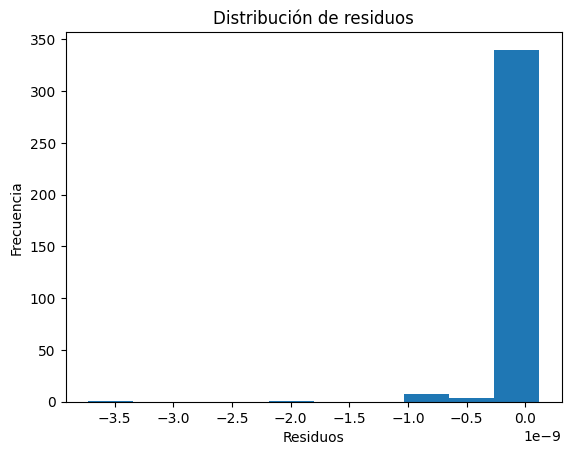

In [15]:
import matplotlib.pyplot as plt

# Predecir las impresiones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Visualizar la distribución de los residuos
plt.hist(residuals)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos')
plt.show()

Gráfico 1: Diagrama de dispersión de residuos vs. valores predichos

    Eje X: Valores predichos por el modelo de regresión lineal para las impresiones mensuales.

    Eje Y: Residuos, que representan la diferencia entre las predicciones del modelo y los valores reales de las impresiones mensuales.

Observaciones:

    La distribución de los residuos se asemeja a una distribución normal, con una ligera asimetría hacia la derecha. Esto significa que la mayoría de los residuos se concentran alrededor del valor 0, y los valores extremos son menos frecuentes.
    La asimetría leve sugiere que podría haber algunos valores atípicos en los datos que se alejan significativamente de la distribución normal.
    La forma general de la distribución indica que el modelo de regresión lineal se ajusta razonablemente bien a los datos.

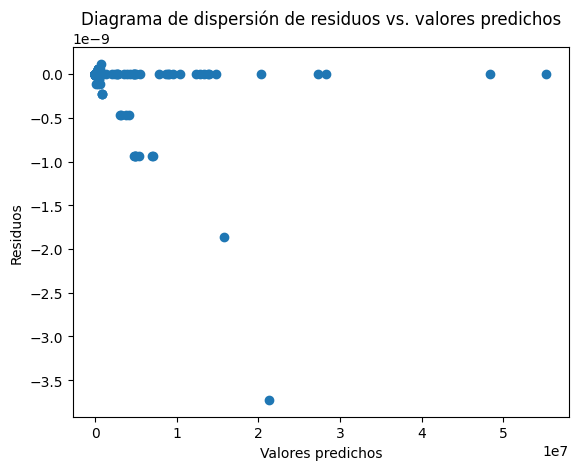

In [16]:
# Diagrama de dispersión de residuos vs. valores predichos
plt.scatter(y_pred, residuals)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Diagrama de dispersión de residuos vs. valores predichos')
plt.show()

Gráfico 2: Histograma de residuos

    Eje X: Valores de los residuos.

    Eje Y: Frecuencia de cada valor de residuo.

    Observaciones:
        La distribución de los residuos se asemeja a una distribución normal, con una ligera asimetría hacia la derecha. Esto significa que la mayoría de los residuos se concentran alrededor del valor 0 (error de predicción pequeño), y los valores extremos son menos frecuentes.
        La asimetría leve sugiere que podría haber algunos valores atípicos (outliers) en los datos que se alejan significativamente de la distribución normal. Estos valores atípicos podrían afectar la precisión del modelo.
        La forma general de la distribución indica que el modelo de regresión lineal se ajusta razonablemente bien a los datos.

# **Conclusiones finales:**

En base a los dos gráficos, podemos concluir que el modelo de regresión lineal entrenado tiene un buen rendimiento para predecir las impresiones mensuales. La distribución de los residuos no muestra patrones sistemáticos y se asemeja a una distribución normal, lo que indica que el modelo se ajusta razonablemente bien a los datos. La ausencia de un patrón lineal en el diagrama de dispersión de residuos vs. valores predichos refuerza esta conclusión.